#DAT-13 HW2 Solutions
Thanks to John Eckstein

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import neighbors, datasets
from sklearn.cross_validation import train_test_split, cross_val_score

### 1. Implement KNN classification, using the sklearn package.

In [23]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)
n_neighbors = range(1,16)
train_answers = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    train_answers.append(clf.score(X_test, y_test))
print train_answers

[0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775]


### 2. Use the sklearn package to implement cross-validation for your classifier. Use 5 folds for your cross-validation.

In [25]:
from sklearn.cross_validation import cross_val_score
#Note we are using 3 neighbors in this example
clf = neighbors.KNeighborsClassifier(3)
scores = cross_val_score(clf, X_test, y_test, cv=5)
print scores.mean()

0.933333333333


### 3. Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset. Hint: This hyperparameter will be a number between 1 and 150.

In [26]:
a = range(1,120)
print a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [27]:
n_neighbors = range(1,120) 
all_scores = []
for n in n_neighbors:   
    clf = neighbors.KNeighborsClassifier(n)    
    scores = cross_val_score(clf, iris.data, iris.target, cv=5)    
    all_scores.append(scores.mean())

best_k = n_neighbors[np.argmax(all_scores)]
print "Best k value: %s" % best_k


Best k value: 6


### 4. Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. Explain in words what you are seeing.

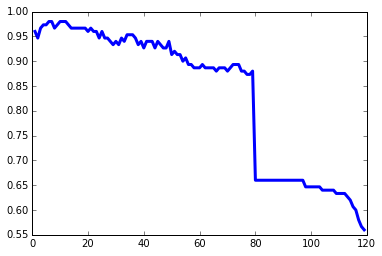

In [28]:
plt.plot(n_neighbors, all_scores, linewidth=3.0)

This graph tells me that with more and more neighbors the result is overfitting, new points aren't classified well, and the accuracy goes down. Too few nieghbors can result in underfitting although the accuracy hit isn't as dramatic as overfitting.

### 5. Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn. Cross validation is a very important concept. Implementing it yourself in Python is the best way to learn and understand it. Compare the results of your cross-validation code with your results using the cross-validation in sklearn.

In [29]:
def score_with_kfold(clf,X,y,num_folds):
    #shuffle to get a better score...
    np.random.seed(12)
    shuffled_indexes = np.random.permutation(xrange(0,len(X)))
    scores=[]
    for test_index in range(num_folds):
        train_data, train_targets, test_data, test_targets = [],[],[],[]
        for i in range(len(X)):
            bucket_num = i % num_folds #get the bucket number
            X_val = X[shuffled_indexes[i]]
            y_val = y[shuffled_indexes[i]]
            
            if bucket_num == test_index:
                test_data.append(X_val) 
                test_targets.append(y_val) 
            else:
                train_data.append(X_val)
                train_targets.append(y_val)
            
#         print "test index %s, test_data count %s, train_data count %s" % (test_index, len(test_data), len(train_data)) 
        #fit and save the score
        clf.fit(train_data, train_targets)
        scores.append(clf.score(test_data,test_targets))

    return np.mean(scores)

In [30]:
clf = neighbors.KNeighborsClassifier(3)    
my_score = score_with_kfold(clf,iris.data,iris.target,5)
sk_score = cross_val_score(clf, iris.data, iris.target, cv=5).mean()
print "My score: %s" % my_score
print "SK score: %s" % sk_score

My score: 0.96
SK score: 0.966666666667


### 6. EXTRA CREDIT 1: Using the value of K obtained in (3) above, vary the number of folds used for cross-validation across an interesting range, e.g. [ 2, 3, 5, 6, 10, 15]. 

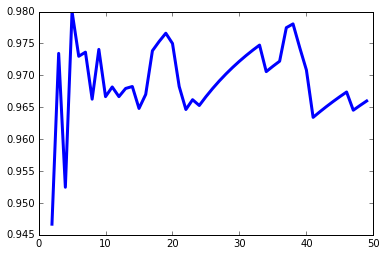

In [31]:
k=best_k
fold_range = xrange(2,50)
fold_scores = []
for num_folds in fold_range:
    clf = neighbors.KNeighborsClassifier(k)        
    scores = cross_val_score(clf, iris.data, iris.target, cv=num_folds)
    fold_scores.append(scores.mean())
    
plt.plot(fold_range, fold_scores , linewidth=3.0)   

#### How does classifier accuracy vary with the number of folds used?

It reaches min at 2 and max at 3 and everything after is very noisy with no real pattern.  

#### Do you think there exists an optimal number of folds to use for this particular problem? Why or why not?

The job of cross validation is to verify that your model is not completely off target.  It seems that any fold number beyond 3 will yield pretty much the same result, thus not providing much benefit to finding an optimal fold number.

### 7. EXTRA CREDIT 2: Write your own implementation of KNN classification in Python, without using the methods from sklearn. Compare your results with the results you obtained using sklearn.

In [50]:
import math
import operator
from scipy.stats import mode

class MyKnn:
    
    def __init__(self,k):        
        self._k = k
    
    def fit(self,X,y):
        self._X = X
        self._y = y
    
    def euclidean_distance(self,n,p):
        #sum of the squares of all dimensions
        squares_sum=0
        if len(n) == len(p):            
            for i in range(len(n)):
                squares_sum += pow((n[i] - p[i]),2)
        else:
            raise TypeError("dimensions must be the same!")
        return math.sqrt(squares_sum)
        
    def predict(self,X_new):
        #get the euclidean distance for each point in X and X_new
        distances = {}
        for i in range(len(self._X)):
            distances[i] = self.euclidean_distance(self._X[i],X_new)
              
        #sort the distances ascending
        sorted_dist = sorted(distances.items(), key=operator.itemgetter(1))
        
        #now take the top k indexes and get their y values
        classes=[]
        for tpl in sorted_dist[0:self._k]:
            classes.append(self._y[tpl[0]])
        
        #take the mode of all the top k classes
        predict_class = mode(classes)[0]
        return int(predict_class)
    
    def score(self,X,y):
        predict_vals = []   
        for i in range(len(X)):            
            predict_vals.append(int(self.predict(X[i]) == y[i]))
            
        return np.mean(predict_vals) 

In [51]:
k=6
myknn = MyKnn(k)
clf = neighbors.KNeighborsClassifier(k)         
my_score = score_with_kfold(myknn,iris.data,iris.target,3)
sk_score = score_with_kfold(clf,iris.data,iris.target,3)

print "My score: %s" % my_score
print "SK score: %s" % sk_score


My score: 0.946666666667
SK score: 0.946666666667
